In [18]:
## Importer les librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

1. DESCIPTION DU DATASET

In [2]:
df = pd.read_csv("Walmart_Store_sales.csv")
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


In [4]:
df.shape

(150, 8)

In [5]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [128]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [3]:
# convertir toutes les observations de Date en datetime
df.loc[:,'Date'] = pd.to_datetime(df['Date'])

# sort values by date
df = df.sort_values(by = 'Date')
df.head()

/tmp/ipykernel_219/2319313208.py:2: UserWarning:

Parsing '18-02-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_219/2319313208.py:2: UserWarning:

Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_219/2319313208.py:2: UserWarning:

Parsing '27-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_219/2319313208.py:2: UserWarning:

Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_219/2319313208.py:2: UserWarning:

Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/tmp/ipykernel_219/2319313208.py:2: UserWarning:

Parsing '15-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN


In [4]:
###Création de nouvelles colonnes dans le dataset : Month Year day day of week

df.loc[:, 'Year'] = df['Date'].dt.year
df.loc[:, 'Month'] = df['Date'].dt.month
df.loc[:, 'Day'] = df['Date'].dt.day
df.loc[:, 'Day_of_week'] = df['Date'].dt.day_of_week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,10.0,6.0
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,4.0,3.0
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951,2010.0,2.0,7.0,6.0
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099,2010.0,2.0,7.0,6.0
115,15.0,2010-02-19,660838.75,0.0,NaN,2.909,131.637000,NaN,2010.0,2.0,19.0,4.0


2. EDA


2.1 les observations

In [131]:
# put all year in an array
all_year = df.Year.unique()
all_year



array([2010., 2011., 2012.,   nan])

In [72]:
# extract last 3 year in the dataset


In [132]:
# extract last 3 year in the dataset
last_years = all_year[:]

fig = go.Figure()

for i in range(len(last_years)):
    if i == 0:
        fig.add_trace(
            go.Histogram(
                x = df.loc[df['Year']==last_years[i], 'Date'],
                nbinsx = df.loc[df['Year']==last_years[i], 'Date'].nunique(),
                visible=True))
    else:
        fig.add_trace(
            go.Histogram(
                x = df.loc[df['Year']==last_years[i], 'Date'],
                nbinsx = df.loc[df['Year']==last_years[i], 'Date'].nunique(),
                visible=False))


fig.update_layout(
        title = go.layout.Title(text = "Daily observations for one year", x = 0.5),
        showlegend = False)

# update for each year
fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [ 
                    go.layout.updatemenu.Button(
                        label = "2010",
                        method = "update",
                        args = [{"visible" : [True, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "2011",
                            method = "update",
                            args = [{"visible" : [False, True, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "2012",
                            method = "update",
                            args = [{"visible" : [False, False, True, False, False]}]),
                  
                ]
    )]
)

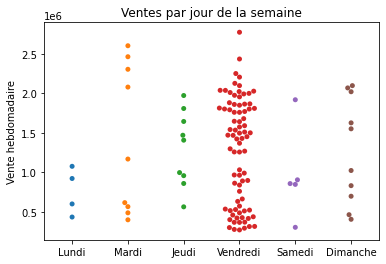

In [74]:
ax = sns.swarmplot(x= "Day_of_week", y= "Weekly_Sales",  data=df)
ax.set(xlabel='', ylabel='Vente hebdomadaire', title='Ventes par jour de la semaine')
ax.set_xticklabels(['Lundi', 'Mardi', 'Jeudi','Vendredi', 'Samedi', 'Dimanche']);

2.2 Les ventes hebdomadaires

In [75]:
# Visualisation moyenne des ventes par magasin
mean_Weekly_Sales_per_Store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
mean_Weekly_Sales_per_Store.head

<bound method NDFrame.head of     Store  Weekly_Sales
0     1.0  1.562508e+06
1     2.0  1.943034e+06
2     3.0  4.030549e+05
3     4.0  2.173759e+06
4     5.0  3.024997e+05
5     6.0  1.551124e+06
6     7.0  5.591300e+05
7     8.0  8.887541e+05
8     9.0  5.068874e+05
9    10.0  1.822106e+06
10   11.0  1.523747e+06
11   12.0  1.028025e+06
12   13.0  1.997235e+06
13   14.0  2.092878e+06
14   15.0  6.335804e+05
15   16.0  5.153178e+05
16   17.0  8.916060e+05
17   18.0  1.140437e+06
18   19.0  1.400615e+06
19   20.0  1.962384e+06>

In [76]:
fig = px.bar(mean_Weekly_Sales_per_Store, x='Store', y='Weekly_Sales')
fig.update_layout(xaxis={"dtick":1})

On s'aperçoit que nous avons 3 magasins dont la moyenne hebdomadaire des ventes est supèrieure à 2 M, par ordre croissant : le 4, 14 et le 13 et qui suivent le 2 et le 20 .

2.3 EDA sur les températures

In [18]:
## visualisation des temperatures moyennes par magasins
mean_temperature_per_store = df.groupby('Store')['Temperature'].mean().reset_index()
mean_temperature_per_store.head

<bound method NDFrame.head of     Store  Temperature
0     1.0    67.776667
1     2.0    57.462500
2     3.0    70.322143
3     4.0    65.624000
4     5.0    72.720000
5     6.0    70.266000
6     7.0    39.967500
7     8.0    70.488750
8     9.0    74.120000
9    10.0    73.336000
10   11.0    69.080000
11   12.0    73.960000
12   13.0    57.798889
13   14.0    45.806250
14   15.0    65.730000
15   16.0    51.343333
16   17.0    55.232000
17   18.0    54.215556
18   19.0    53.756250
19   20.0    54.280000>

In [20]:
px.bar(mean_temperature_per_store, x='Store', y='Temperature',)


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Temperature'>

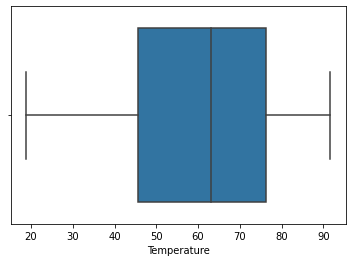

In [125]:
# présence de valeurs abérrantes
sns.boxplot(df['Temperature'])

2.4 EDA sur le CPI

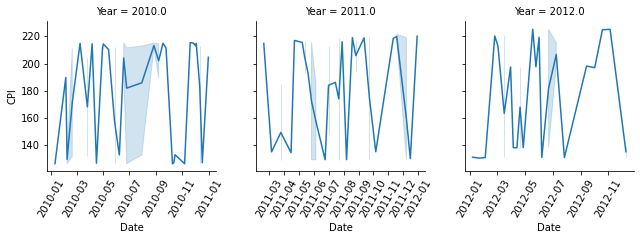

In [126]:
g = sns.FacetGrid(df, col='Year', sharex=False)
g.map(sns.lineplot, 'Date', 'CPI')
g.set_xticklabels(rotation=60)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CPI'>

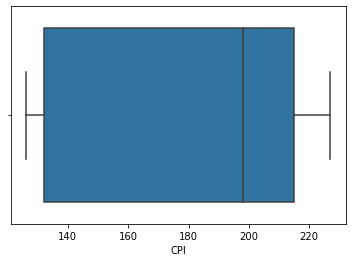

In [127]:
#Visualisation des valeurs abérrantes
sns.boxplot(df['CPI'])

In [128]:
# Visualisation de la moyenne des CPI par magasin
mean_Store_per_CPI = df.groupby('Store')['CPI'].mean().reset_index()
mean_Store_per_CPI.head

<bound method NDFrame.head of     Store         CPI
0     1.0  216.368313
1     2.0  214.769437
2     3.0  220.115306
3     4.0  128.196148
4     5.0  216.905432
5     6.0  215.902088
6     7.0  195.319489
7     8.0  216.373831
8     9.0  215.001735
9    10.0  128.162431
10   11.0  217.844972
11   12.0  128.060487
12   13.0  129.041653
13   14.0  185.325833
14   15.0  134.987597
15   16.0  194.473622
16   17.0  128.331461
17   18.0  134.888911
18   19.0  135.319093
19   20.0  209.187937>

In [34]:
fig=px.bar(mean_Store_per_CPI, x='Store', y='CPI',)
fig.update_layout(xaxis={"dtick":1})

2.5 le TAUX DE CHOMAGE

In [129]:
# Visualize du taux moyen de chômage par magasin
mean__Unemployment_per_Store = df.groupby('Store')['Unemployment'].mean().reset_index()
mean__Unemployment_per_Store.head

<bound method NDFrame.head of     Store  Unemployment
0     1.0      7.712000
1     2.0      7.612833
2     3.0      7.058929
3     4.0      6.272857
4     5.0      6.280875
5     6.0      6.732000
6     7.0      8.355429
7     8.0      6.341857
8     9.0      6.462000
9    10.0      8.436400
10   11.0      7.247667
11   12.0     13.893600
12   13.0      7.010444
13   14.0      8.633429
14   15.0      7.802333
15   16.0      6.357500
16   17.0      6.192333
17   18.0      8.905889
18   19.0      8.064111
19   20.0      7.496000>

In [43]:
fig=px.bar(mean__Unemployment_per_Store, x='Store', y='Unemployment',)
fig.update_layout(xaxis={"dtick":1})

2.5 Les corrélations des variables

In [77]:
correlation = df.iloc[:,1:].corr()
correlation

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
Weekly_Sales,1.000000,0.037037,-0.165991,-0.019087,-0.287227,0.055191,-0.037837,-0.049126,-0.015375,0.025520
Holiday_Flag,0.037037,1.000000,-0.187922,-0.117447,0.171969,0.096934,0.008307,0.303578,-0.127441,-0.285289
Temperature,-0.165991,-0.187922,1.000000,0.048943,0.137936,-0.030122,-0.137289,0.055604,0.180895,0.171128
Fuel_Price,-0.019087,-0.117447,0.048943,1.000000,-0.159881,0.086241,0.810191,-0.156432,0.002241,0.045693
CPI,-0.287227,0.171969,0.137936,-0.159881,1.000000,-0.348072,-0.006642,0.157679,0.105207,-0.087226
Unemployment,0.055191,0.096934,-0.030122,0.086241,-0.348072,1.000000,-0.182377,0.018774,-0.072157,0.076401
Year,-0.037837,0.008307,-0.137289,0.810191,-0.006642,-0.182377,1.000000,-0.150667,-0.127009,-0.138505
Month,-0.049126,0.303578,0.055604,-0.156432,0.157679,0.018774,-0.150667,1.000000,-0.142434,-0.261651
Day,-0.015375,-0.127441,0.180895,0.002241,0.105207,-0.072157,-0.127009,-0.142434,1.000000,0.191885
Day_of_week,0.025520,-0.285289,0.171128,0.045693,-0.087226,0.076401,-0.138505,-0.261651,0.191885,1.000000


In [78]:
abs(correlation['Weekly_Sales']).sort_values(ascending = False)

Weekly_Sales    1.000000
CPI             0.287227
Temperature     0.165991
Unemployment    0.055191
Month           0.049126
Year            0.037837
Holiday_Flag    0.037037
Day_of_week     0.025520
Fuel_Price      0.019087
Day             0.015375
Name: Weekly_Sales, dtype: float64

## Partie 2  : Modèle de base (régression linéaire)

In [5]:
##réindaxation des colonnes
print(df)
print('Rearranging ..................')
print('..............................')
df = df.reindex(columns=['Store', 'Date', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Day_of_week','Weekly_Sales'])
print(df)

     Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
14    17.0 2010-01-10     829207.27           0.0        60.07       2.853   
20     7.0 2010-02-04     561145.14           0.0        38.26       2.725   
99    13.0 2010-02-07    2018314.71           0.0        78.82       2.814   
47    19.0 2010-02-07    1549018.68           0.0        66.25       2.958   
115   15.0 2010-02-19     660838.75           0.0          NaN       2.909   
..     ...        ...           ...           ...          ...         ...   
92     3.0        NaT     384200.69           0.0          NaN       2.667   
102   18.0        NaT    1087051.26           0.0        69.75       3.815   
129   18.0        NaT    1048134.24           0.0        73.25       3.840   
137   10.0        NaT    1831676.03           0.0        88.44       3.112   
146    7.0        NaT     716388.81           NaN        20.74       2.778   

            CPI  Unemployment    Year  Month   Day  Day_of_week

In [21]:
##Suppréssion des valeurs manquantes pour les ventes hebdomadaires

In [6]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
Year            12.000000
Month           12.000000
Day             12.000000
Day_of_week     12.000000
Weekly_Sales     9.333333
dtype: float64

In [7]:
print(df.iloc[:-1].isnull())

     Store   Date  Holiday_Flag  Temperature  Fuel_Price    CPI  Unemployment  \
14   False  False         False        False       False  False         False   
20   False  False         False        False       False  False         False   
99   False  False         False        False       False  False         False   
47   False  False         False        False       False  False         False   
115  False  False         False         True       False  False          True   
..     ...    ...           ...          ...         ...    ...           ...   
91   False   True         False        False       False   True         False   
92   False   True         False         True       False  False          True   
102  False   True         False        False       False  False         False   
129  False   True         False        False       False  False         False   
137  False   True         False        False       False  False         False   

      Year  Month    Day  D

In [8]:
index_with_nan = df.index[df.iloc[:,-1].isnull()]

df.drop(index_with_nan,0, inplace=True)


print(df)

     Store       Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
14    17.0 2010-01-10           0.0        60.07       2.853  126.234600   
20     7.0 2010-02-04           0.0        38.26       2.725  189.704822   
99    13.0 2010-02-07           0.0        78.82       2.814  126.139200   
47    19.0 2010-02-07           0.0        66.25       2.958  132.521867   
115   15.0 2010-02-19           0.0          NaN       2.909  131.637000   
..     ...        ...           ...          ...         ...         ...   
92     3.0        NaT           0.0          NaN       2.667  214.702765   
102   18.0        NaT           0.0        69.75       3.815  135.446800   
129   18.0        NaT           0.0        73.25       3.840  138.185710   
137   10.0        NaT           0.0        88.44       3.112  126.128355   
146    7.0        NaT           NaN        20.74       2.778         NaN   

     Unemployment    Year  Month   Day  Day_of_week  Weekly_Sales  
14          6.885  

/tmp/ipykernel_219/803253076.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [9]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            13.235294
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
Year            13.235294
Month           13.235294
Day             13.235294
Day_of_week     13.235294
Weekly_Sales     0.000000
dtype: float64

In [55]:
df.shape


(136, 12)

In [ ]:
##Suppréssion  des valeurs aberrantes en utilisant Z-score: 

In [10]:
df_clean = df.copy()

In [11]:
#Supprimer les valeurs aberrantes pour le taux de chomage
upper_bound3=df["Unemployment"].mean()+df["Unemployment"].std()*3
upper_bound3

12.523867092274015

In [12]:
lower_bound3=df["Unemployment"].mean()-df["Unemployment"].std()*3
lower_bound3

2.807296842152212

In [13]:
mask3=(((df_clean["Unemployment"] < upper_bound3) & (df_clean["Unemployment"] > lower_bound3)) | df_clean["Unemployment"].isna())
df_clean = df_clean[mask3]

In [14]:
#Supprimer les valeurs aberrantes pour Fuel_Price 
upper_bound1=df["Fuel_Price"].mean()+df["Fuel_Price"].std()*3
upper_bound1

4.755612641575396

In [15]:
lower_bound1=df["Fuel_Price"].mean()-df["Fuel_Price"].std()*3
lower_bound1

1.878371229392345

In [16]:
mask1=(((df_clean["Fuel_Price"] < upper_bound1) & (df_clean["Fuel_Price"] > lower_bound1)) | df_clean["Fuel_Price"].isna())
df_clean = df_clean[mask1]

In [17]:
#Supprimer les valeurs aberrantes pour CPI 
upper_bound2=df["CPI"].mean()+df["CPI"].std()*3
upper_bound2

298.82045814693976

In [18]:
lower_bound2=df["CPI"].mean()-df["CPI"].std()*3
lower_bound2

57.36182994106019

In [65]:
mask2=(((df_clean["CPI"] < upper_bound2) & (df_clean["CPI"] > lower_bound2)) | df_clean["CPI"].isna())
df_clean = df_clean[mask2]

In [19]:
#Supprimer les valeurs aberrantes pour les températures
upper_bound=df["Temperature"].mean()+df["Temperature"].std()*3
upper_bound

116.39726255188086

In [20]:
lower_bound=df["Temperature"].mean()-df["Temperature"].std()*3
lower_bound

5.310671332416689

In [21]:
mask=(((df_clean["Temperature"] < upper_bound) & (df_clean["Temperature"] > lower_bound)) | df_clean["Temperature"].isna())
df_clean = df_clean[mask]

In [22]:
df_clean.shape

(131, 12)

In [153]:
df.shape

(136, 12)

In [23]:
df_clean.drop(columns=["Date"],inplace=True)

In [71]:
df_clean.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week,Weekly_Sales
14,17.0,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,10.0,6.0,829207.27
20,7.0,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,4.0,3.0,561145.14
99,13.0,0.0,78.82,2.814,126.139200,7.951,2010.0,2.0,7.0,6.0,2018314.71
47,19.0,0.0,66.25,2.958,132.521867,8.099,2010.0,2.0,7.0,6.0,1549018.68
115,15.0,0.0,NaN,2.909,131.637000,NaN,2010.0,2.0,19.0,4.0,660838.75


les corrélations de varaibles du nouveau DATASET

In [25]:
correlation = df_clean.iloc[:,1:].corr()
correlation

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week,Weekly_Sales
Holiday_Flag,1.000000,-0.285955,-0.144879,0.195295,0.062108,0.000441,0.294942,-0.164849,-0.301952,0.052915
Temperature,-0.285955,1.000000,0.020837,0.152863,-0.174591,-0.155777,0.025046,0.194326,0.200487,-0.155865
Fuel_Price,-0.144879,0.020837,1.000000,-0.137136,-0.036345,0.834017,-0.184570,-0.014137,0.023543,-0.008362
CPI,0.195295,0.152863,-0.137136,1.000000,-0.247916,-0.021591,0.205144,0.085357,-0.007281,-0.314602
Unemployment,0.062108,-0.174591,-0.036345,-0.247916,1.000000,-0.174425,-0.154524,-0.014889,-0.019885,0.190210
Year,0.000441,-0.155777,0.834017,-0.021591,-0.174425,1.000000,-0.163865,-0.149297,-0.142293,-0.040318
Month,0.294942,0.025046,-0.184570,0.205144,-0.154524,-0.163865,1.000000,-0.168483,-0.311267,-0.043327
Day,-0.164849,0.194326,-0.014137,0.085357,-0.014889,-0.149297,-0.168483,1.000000,0.197025,-0.022423
Day_of_week,-0.301952,0.200487,0.023543,-0.007281,-0.019885,-0.142293,-0.311267,0.197025,1.000000,0.034531
Weekly_Sales,0.052915,-0.155865,-0.008362,-0.314602,0.190210,-0.040318,-0.043327,-0.022423,0.034531,1.000000


In [26]:
abs(correlation['Weekly_Sales']).sort_values(ascending = False)

Weekly_Sales    1.000000
CPI             0.314602
Unemployment    0.190210
Temperature     0.155865
Holiday_Flag    0.052915
Month           0.043327
Year            0.040318
Day_of_week     0.034531
Day             0.022423
Fuel_Price      0.008362
Name: Weekly_Sales, dtype: float64

3 . Le modèle de régression linéaire

In [72]:
X=df_clean.iloc[: ,:-1]
Y=df_clean.iloc[:, -1:]

In [73]:
#Séparer la variable cible Y des entités X
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [74]:
# Create pipeline for numeric features
numeric_features = [2,3,4,5,6,7,8,9] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [75]:
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [33]:
preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out()

NameError: name 'preprocessor' is not defined

In [77]:
# This will create an AttributeError because X_train is not a pandas DataFrame anymore !
X_train


array([[-1.01702892e+00, -4.58408960e-02, -1.36507637e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.62476820e+00,  8.18526196e-01,  9.43846774e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.58678146e-01, -8.79572193e-01, -1.23249472e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.24679418e+00,  6.98171285e-01, -1.31417099e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.08156066e-16,  9.23563210e-01,  1.10996044e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.93783796e+00, -3.69705022e-01, -7.38549235e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [78]:
# Actually, X_train is a numpy array 
type(X_train)


numpy.ndarray

In [37]:
# Numpy syntax to display 5 first lines
X_train[0:5]


array([[-1.01702892e+00, -4.58408960e-02, -1.36507637e+00,
         1.48591310e+00,  0.00000000e+00, -2.90069308e-16,
         4.69874694e-16, -3.86390309e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.62476820e+00,  8.18526196e-01,  9.43846774e-01,
        -8.59894904e-01,  1.81075060e-01,  6.00623461e-02,
         1.79232351e+00,  2.40020310e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [79]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")


Training model...
...Done.


In [80]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()


Predictions on training set...
...Done.
[[1900415.17172702]
 [ 213758.4572542 ]
 [1232419.96495985]
 [ 485467.62156359]
 [ 864410.75388404]]



In [40]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on test set...
...Done.
[[ 447047.78386805]
 [2017244.54382222]
 [1462187.13007248]
 [ 637208.98349321]
 [ 497761.49719227]]



In [81]:
#Training _Machine Learning


In [82]:
 #Print R2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9649966438947504
R2 score on test set :  0.9462462452642929


In [ ]:
#Comment interprèter le modèle en fonction des coefficients

In [43]:
regressor.coef_

array([[  -45623.31576866,    -8962.09459293,    39718.31949604,
          -83018.35778712,   -48020.99800046,    32240.40395229,
           -4443.6045547 ,   -15241.96037961,   384799.69727142,
        -1174962.36771194,   562396.7262884 , -1348963.94355948,
          -35019.50820103,  -958127.60438503,  -834605.62110845,
        -1191582.09523718,   477488.63529295,  -187852.77845144,
          509320.15491161,   616695.29322832,  -813112.35628048,
        -1095816.79254602,  -726755.26174983,  -283464.82543432,
          -15092.98147908,   482074.84198248,   -16462.0424816 ]])

In [90]:
import sklearn
sklearn.__version__

'1.0.2'

In [91]:
!pip install sklearn

In [92]:
conda install scikit-learn=1.1.2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - scikit-learn=1.1.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    libgcc-ng-12.2.0           |      h65d4601_19         931 KB  conda-forge
    libgomp-12.2.0             |      h65d4601_19         455 KB  conda-forge
    libstdcxx-ng-12.2.0        |      h46fd767_19         4.3 MB  conda-forge
    openssl-1.1.1s             |       h166bdaf_0         2.1 MB  conda-forge
    scikit-learn-1.1.2         |   py39he5e8d7e_0         8.2 MB  conda-forge
    

In [ ]:
		coefficients
3	num__CPI	39718.319496039854
4	num__Unemployment	-83018.35778712016
5	num__Year	-48020.998000461725
6	num__Month	32240.403952290908
7	num__Day	-4443.604554700342
8	num__Day_of_week	-15241.96037961133
9	cat__Store_2.0	384799.6972714204
10	cat__Store_3.0	-1174962.3677119438
11	cat__Store_4.0	562396.7262883936
12	cat__Store_5.0	-1348963.9435594825
13	cat__Store_6.0	-35019.50820103068
14	cat__Store_7.0	-958127.6043850277
15	cat__Store_8.0	-834605.6211084536
16	cat__Store_9.0	-1191582.0952371776
17	cat__Store_10.0	477488.6352929423
18	cat__Store_11.0	-187852.77845144054
19	cat__Store_13.0	509320.1549116047
20	cat__Store_14.0	616695.2932283196
21	cat__Store_15.0	-813112.3562804845
22	cat__Store_16.0	-1095816.7925460243
23	cat__Store_17.0	-726755.2617498275
24	cat__Store_18.0	-283464.82543432375
25	cat__Store_19.0	-15092.981479078167
26	cat__Store_20.0	482074.84198248014
27	cat__Holiday_Flag_1.0	-16462.042481598848

4 Combattre le surentraînement 

In [173]:
from sklearn.linear_model import Ridge

In [174]:
#Model Ridge
regressor = Ridge()
regressor.fit(X_train, Y_train)
regressor

Ridge()

In [175]:
r2_score_train = regressor.score(X_train, Y_train)
r2_score_test = regressor.score(X_test, Y_test)
print("R2 on train: ", r2_score_train)
print("R2 on test: ", r2_score_test) 

R2 on train:  0.926297535720745
R2 on test:  0.9133134908282551


In [176]:
regressor.coef_

array([[ -43112.37427912,   -5379.44075467,  -46451.2464935 ,
           6793.43886466,  -26984.40257296,   34473.84306909,
          -9564.78673057,   -9526.45483392,  554156.11274903,
        -799473.08545862,  649455.64964318, -805818.81169806,
         243249.23843233, -711707.2698242 , -409336.55202536,
        -656932.1296131 ,  370994.54319817,   81185.25153147,
         536010.03373398,  638153.22260288, -563348.21072834,
        -512865.88864762, -477879.47146368, -269114.6653036 ,
          10727.34506501,  566308.37234075,   77432.16007305]])

In [ ]:
coefs = pd.DataFrame(index=df_clean.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

model RIDGE : Utilisation de la fonction GridSearchCV afin de rechercher le meilleur paramètre de pénalisation pour le modèle LASSO. 

In [178]:
regressor = Ridge()
regressor

Ridge()

In [179]:
params= {
    "alpha":[0.001,0.03,0.06,0.08,0.1]
}
optimized_regressor = GridSearchCV(regressor,params,cv=2)
optimized_regressor.fit(X_train,Y_train)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.03, 0.06, 0.08, 0.1]})

In [180]:
optimized_regressor.score(X_test, Y_test)

0.9461437942142474

In [181]:
print("Optimized estimator", optimized_regressor.best_estimator_)
print("Best Parameters", optimized_regressor.best_params_)

Optimized estimator Ridge(alpha=0.03)
Best Parameters {'alpha': 0.03}


In [182]:
r2_score_train = optimized_regressor.score(X_train, Y_train)
r2_score_test = optimized_regressor.score(X_test, Y_test)
print("R2 on train: ", r2_score_train)
print("R2 on test: ", r2_score_test) 

R2 on train:  0.9648358779194045
R2 on test:  0.9461437942142474


model lasso  :
Utilisation de la fonction GridSearchCV afin de rechercher le meilleur paramètre de pénalisation pour le modèle LASSO. 

In [183]:
params = {'alpha' : [20, 200, 300, 400, 500]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 3, verbose=1)

grid.fit(X_train,Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [20, 200, 300, 400, 500]}, verbose=1)

In [184]:
grid.best_params_

{'alpha': 300}

In [185]:
r2_score_train = grid.score(X_train, Y_train)
r2_score_test = grid.score(X_test, Y_test)
print("R2 on train: ", r2_score_train)
print("R2 on test: ", r2_score_test) 

R2 on train:  0.9647936213405766
R2 on test:  0.9475763936747877


Conclusion : nous n'avons pas d'amélioration en utilisant la méthode Ridge et lasso. Le modèle semble faire de bonne prédiction sur un petit Dataset mais avec des "features" sains; Pas de valeurs nulles, des observations cohérentes; On peut estimer que les prédictions sont bonnes 